## ANOVA

Prueba que nos permite comprobar si el grupo al que pertenecen nuestros datos hacen diferencia significativa en los resultados.

Supuestos:
- Normalidad 
- Varianza entre grupos
- Independencia


### Construcción de anova

![ANOVA](https://camo.githubusercontent.com/f4be2d25ab16745e51ad1d15349badb3329ec78d/68747470733a2f2f73332d65752d776573742d312e616d617a6f6e6177732e636f6d2f69682d6d6174657269616c732f75706c6f6164732f646174612d7374617469632f696d616765732f616e6f76612e706e67)

H0 = la media es la misma, es decir no hay diferencia entre los grupos.

$\mu_i == \mu_j$

##### Ej
Supongamos los siguientes datos

| Valor | Grupo |
|:-----:|:-----:|
| 3     | A     |
| 2     | A     |
| 1     | A     |
| 5     | B     |
| 3     | B     | 
| 4     | B     |
| 5     | C     |
| 6     | C     |
| 7     | C     |

Lo cual podemos resumir de la siguiente manera

| A | B | C |
|---|---|---|
| 3 | 5 | 5 |
| 2 | 3 | 6 |
| 1 | 4 | 7 |

- SSB DOF = 3-1 =2 
- SSE DOF = 9-3 = 6
- SST DOF = 9-1 = 8

$\overline{X} = 36/9 =4$ \\
$\overline{X_A} = (3+2+1)/3 $

- SST : A cada dato restar la media total, elevarla al cuadrado y sumar cada resultado: $(3-4)^2 + (5-4)^2 + .... + (7-4)^2$ 
- SSB : Restamos la media de cada grupo con la media total, elevamos al cuadrado y multiplicamos ese resultado por el # de elementos. Y a cada resultado lo sumamos $3((2-4)^2) + 3((6-4)^2)$
- SSE :Le restamos a cada elemento su media correspondiente según el grupo, elevamos al cuadrado y sumamos resultados $ (3-2)^2 + ...+ (7-6)^2 $

# Primero calculamos la media de cada uno de los grupos
$\overline{X},\overline{X}_A,\overline{X}_B,\overline{X}_C$
# Resultando en
$\overline{X}=4$
$\overline{X}_A=2$
$\overline{X}_B=4$
$\overline{X}_C=6$
$$SST=\sum\sum(X-\overline{X})^2=30$$
$$SSB=\sum n_i(\overline{X}_i-\overline{X})^2=24$$
$$SSE=\sum\sum(X-\overline{X}_i)^2=6$$
# Media de los cuadrados aplicando formulas de arriba
$$MSB=\frac{24}{2}=12$$
$$MSE=\frac{6}{6}=1$$
$$F=12$$

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import numpy as np
import pandas as pd


In [4]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})


In [5]:
df.head()

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6


In [7]:
df1 = df[['sun','height']].copy()
df1.head()

,sun,height
0,low,6
1,low,6
2,low,6
3,low,5
4,low,6


In [12]:
df1['sun_conteo'] = df1.groupby('sun').cumcount()
df1_pivot = df1.pivot(index='sun_conteo', columns='sun', values='height')
df1_pivot.columns = ['sun_'+str(x) for x in df1_pivot.columns.values]
df1_pivot.head()

,sun_high,sun_low,sun_med
sun_conteo,,,
0,6,6,5
1,6,6,5
2,7,6,6
3,8,5,4
4,7,6,5


In [13]:
f_oneway(df1_pivot.sun_high, df1_pivot.sun_low, df1_pivot.sun_med)

F_onewayResult(statistic=14.105042016806728, pvalue=6.399739638619801e-05)

In [27]:
# Ordinal Least Squares
model_simp = ols('height ~ sun', data=df1).fit()

In [32]:
model_simp

In [26]:
sm.stats.anova_lm(model_simp)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


In [30]:
# Ordinal Least Squares
model_duo = ols('height ~ sun + water', data=df).fit()

In [31]:
sm.stats.anova_lm(model_duo)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,21.174672,0.000003
water,1.0,8.533333,8.533333,14.532751,0.000762
Residual,26.0,15.266667,0.587179,NaN,NaN


SI el valor de mi F es mayor al valor de mi tabla http://www.socr.ucla.edu/Applets.dir/F_Table.html , rechazamos H0 con confianza del 90%

## Regresión Lineal

Es un módelo que nos permite representar una variable como combinación lineal de otras, es decir
$$ Y = \beta_0 + \beta_1X_1 +\dots+ \beta_nX_n$$

- Ya tenemos neusstras x (sol, agua...) pero queremos encontrar las beta


Para visualizar de mejor manera veremos el caso particular
$$ Y = \beta_0 + \beta_1X + \varepsilon$$

Podemos observarlo de la siguiente manera \\
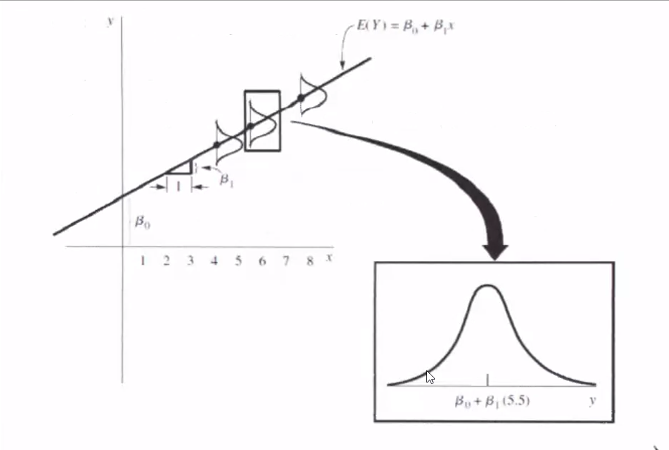

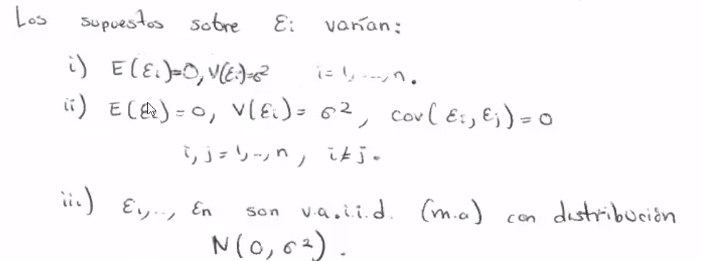

In [37]:
auto = pd.read_csv('../../datasets/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [38]:
car = auto[['acceleration','mpg']].copy()

In [39]:
car.head()

,acceleration,mpg
0,12.0,18.0
1,11.5,15.0
2,11.0,18.0
3,12.0,16.0
4,10.5,17.0


In [47]:
import seaborn as sns
from scipy.stats import linregress

In [53]:
slope, intercept, rvalue, pvalue, stderr = linregress(car.acceleration, car.mpg)

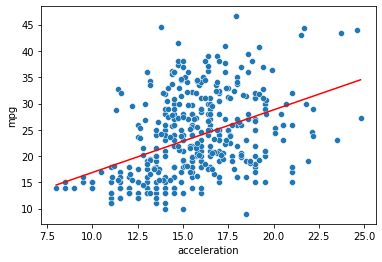

In [54]:
sns.scatterplot(x=car.acceleration, y=car.mpg)
x = [car.acceleration.min(), car.acceleration.max()]
y = [intercept + car.acceleration.min()*slope, intercept + car.acceleration.max()*slope]
sns.lineplot(x=x, y=y, color='r');